In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
const = np.fromfile('/tmp/dslwpb_constellation.c64', dtype = 'complex64')

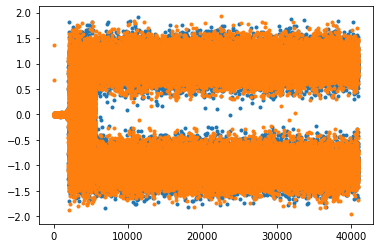

In [3]:
plt.plot(const.real, '.')
plt.plot(const.imag, '.')

In [4]:
sel = slice(10000,20000)

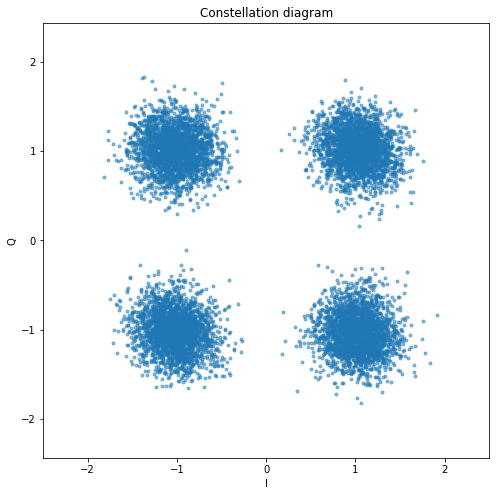

In [5]:
plt.figure(figsize = (8,8), facecolor = 'w')
plt.plot(const[sel].real, const[sel].imag, '.', alpha = 0.5)
plt.title('Constellation diagram')
plt.xlabel('I')
plt.ylabel('Q')
plt.axis('equal')
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5]);

In [6]:
def mer_dB(x):
    constellation = np.sqrt(2)*np.exp(2*np.pi*1j*(np.arange(4) + 0.5)/4)
    err = np.min(np.abs(x.reshape((-1,1)) - constellation.reshape((1,-1))), axis = 1)
    P_signal = 2
    P_error = np.average(np.abs(err)**2)
    return 10 * np.log10(P_signal/P_error)

In [7]:
mer_dB(const[sel])

12.848422943299626